In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('Display.max_columns',None)

In [235]:
df=pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


# Preprocessing Data Part 1

In [236]:
df.select_dtypes(include='object').nunique()

,0
Gender,3
Education Level,7
Job Title,193


In [237]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [238]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [239]:
def segment_job_title(job_title):
  job_title=str(job_title)
  job_title_keywords = {
        'Sales': ['Sales Associate', 'Sales Manager', 'Sales Director', 'Sales Executive', 'Sales Representative', 'Sales Operations Manager', 'Director of Sales', 'Senior Sales Manager', 'Junior Sales Representative', 'Senior Sales Representative', 'Junior Sales Associate'],
        'Marketing': ['Marketing Analyst', 'Marketing Coordinator', 'Marketing Manager', 'Marketing Specialist', 'Digital Marketing Manager', 'Marketing Director', 'Content Marketing Manager', 'Product Marketing Manager', 'Social Media Specialist', 'Social Media Manager', 'Digital Marketing Specialist', 'Junior Marketing Analyst', 'Senior Marketing Manager', 'Junior Marketing Manager', 'Junior Social Media Manager', 'Senior Marketing Director'],
        'Product Management': ['Product Manager', 'Senior Product Manager', 'Junior Product Manager', 'Director of Product Management', 'Senior Product Development Manager'],
        'Engineering': ['Software Developer', 'Senior Engineer', 'Junior Developer', 'Software Engineer Manager', 'Back end Developer', 'Full Stack Engineer', 'Front end Developer', 'Developer', 'Director of Engineering', 'Senior Software Engineer', 'Junior Software Developer', 'Junior Software Engineer', 'Senior Project Engineer', 'Junior Web Developer', 'Senior Software Architect'],
        'Human Resources': ['HR Manager', 'Recruiter', 'HR Generalist', 'Senior HR Manager', 'Junior HR Generalist', 'Junior HR Coordinator', 'Director of Human Resources', 'HR Coordinator', 'Director of Human Capital', 'Senior Human Resources Manager'],
        'Finance': ['Financial Analyst', 'Financial Manager', 'VP of Finance', 'Junior Financial Analyst', 'Senior Financial Analyst', 'Financial Advisor', 'Junior Financial Advisor', 'Senior Financial Manager', 'Junior Accountant', 'Senior Accountant'],
        'Operations': ['Operations Manager', 'Operations Director', 'VP of Operations', 'Operations Analyst', 'Senior Operations Manager', 'Junior Operations Analyst', 'Senior Operations Analyst'],
        'IT Support': ['IT Support', 'IT Manager', 'Help Desk Analyst', 'Senior IT Support Specialist', 'Technical Support Specialist'],
        'Consulting': ['Strategy Consultant', 'Senior Consultant', 'Junior Consultant'],
        'Creative': ['Graphic Designer', 'UX Designer', 'Content Marketing Manager', 'UX Researcher', 'Junior Designer', 'Junior Web Designer'],
        'Data': ['Data Scientist', 'Junior Data Scientist', 'Senior Data Scientist', 'Business Intelligence Analyst', 'Data Analyst', 'Senior Data Analyst'],
        'Customer Service': ['Customer Service Rep', 'Customer Service Manager', 'Customer Success Manager', 'Customer Success Rep', 'Junior Customer Support Specialist'],
        'Executive': ['CEO', 'Chief Technology Officer', 'Chief Data Officer'],
        'Other': ['Receptionist', 'Delivery Driver']
    }

  for key,value in job_title_keywords.items():
    if any(job in job_title for job in value):
      return key
  return 'Other'

In [240]:
df['segment_job_title']=df['Job Title'].apply(segment_job_title)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,segment_job_title
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Other
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Other
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales
4,52.0,Male,Master's,Director,20.0,200000.0,Other


In [241]:
def segment_education_level(edu):
  edu=str(edu)
  education_keywords = {
        'High School': ['High School'],
        'Bachelor': ["Bachelor's", "Bachelor's Degree"],
        'Master': ["Master's", "Master's Degree"],
        'PhD': ['PhD', 'phD'],
    }

  for key,value in education_keywords.items():
    if any(educ in edu for educ in value):
      return key
  return 'Other'

In [242]:
df['segment_education']=df['Education Level'].apply(segment_education_level)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,segment_job_title,segment_education
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Other,Bachelor
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data,Master
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Other,PhD
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales,Bachelor
4,52.0,Male,Master's,Director,20.0,200000.0,Other,Master


# EDA

<ipython-input-243-398fb01009e8>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-243-398fb01009e8>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-243-398fb01009e8>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-243-398fb01009e8>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)


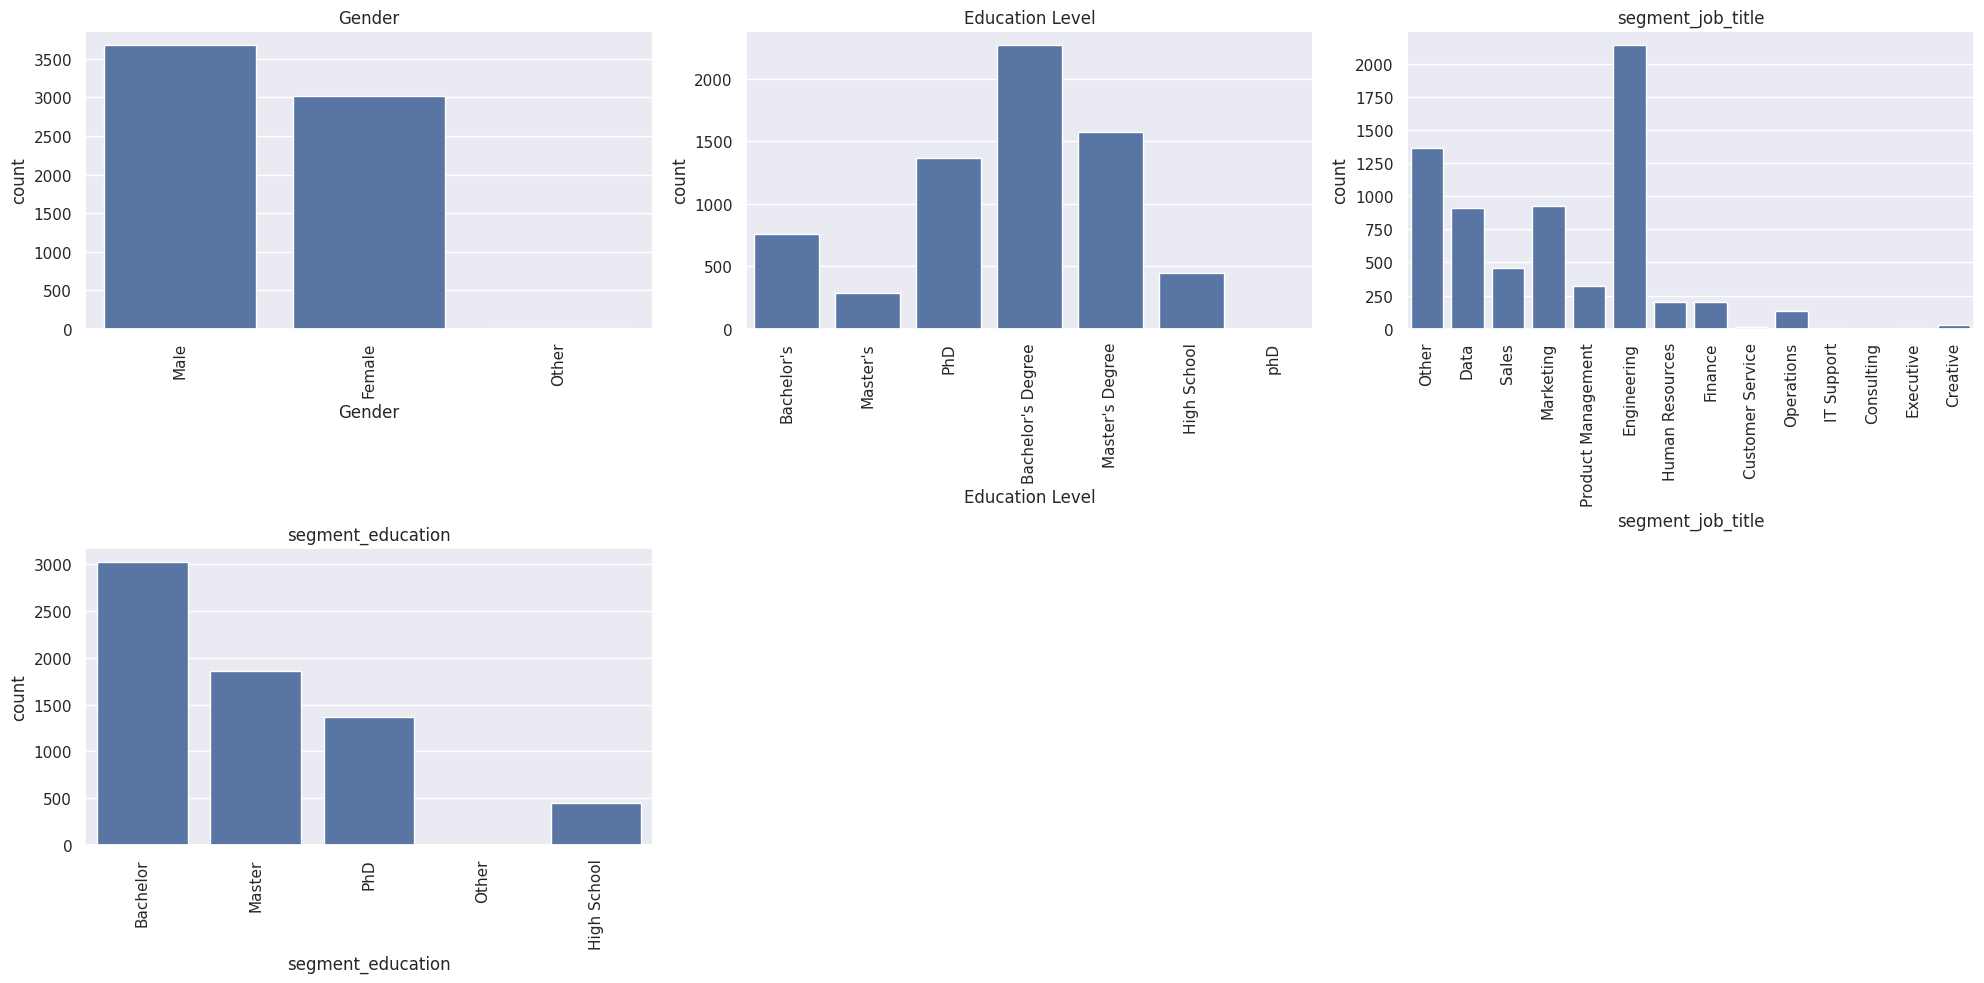

In [243]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
# cat_vars.remove('Education Level')
cat_vars.remove('Job Title')

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  top_values=df[var].value_counts().index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

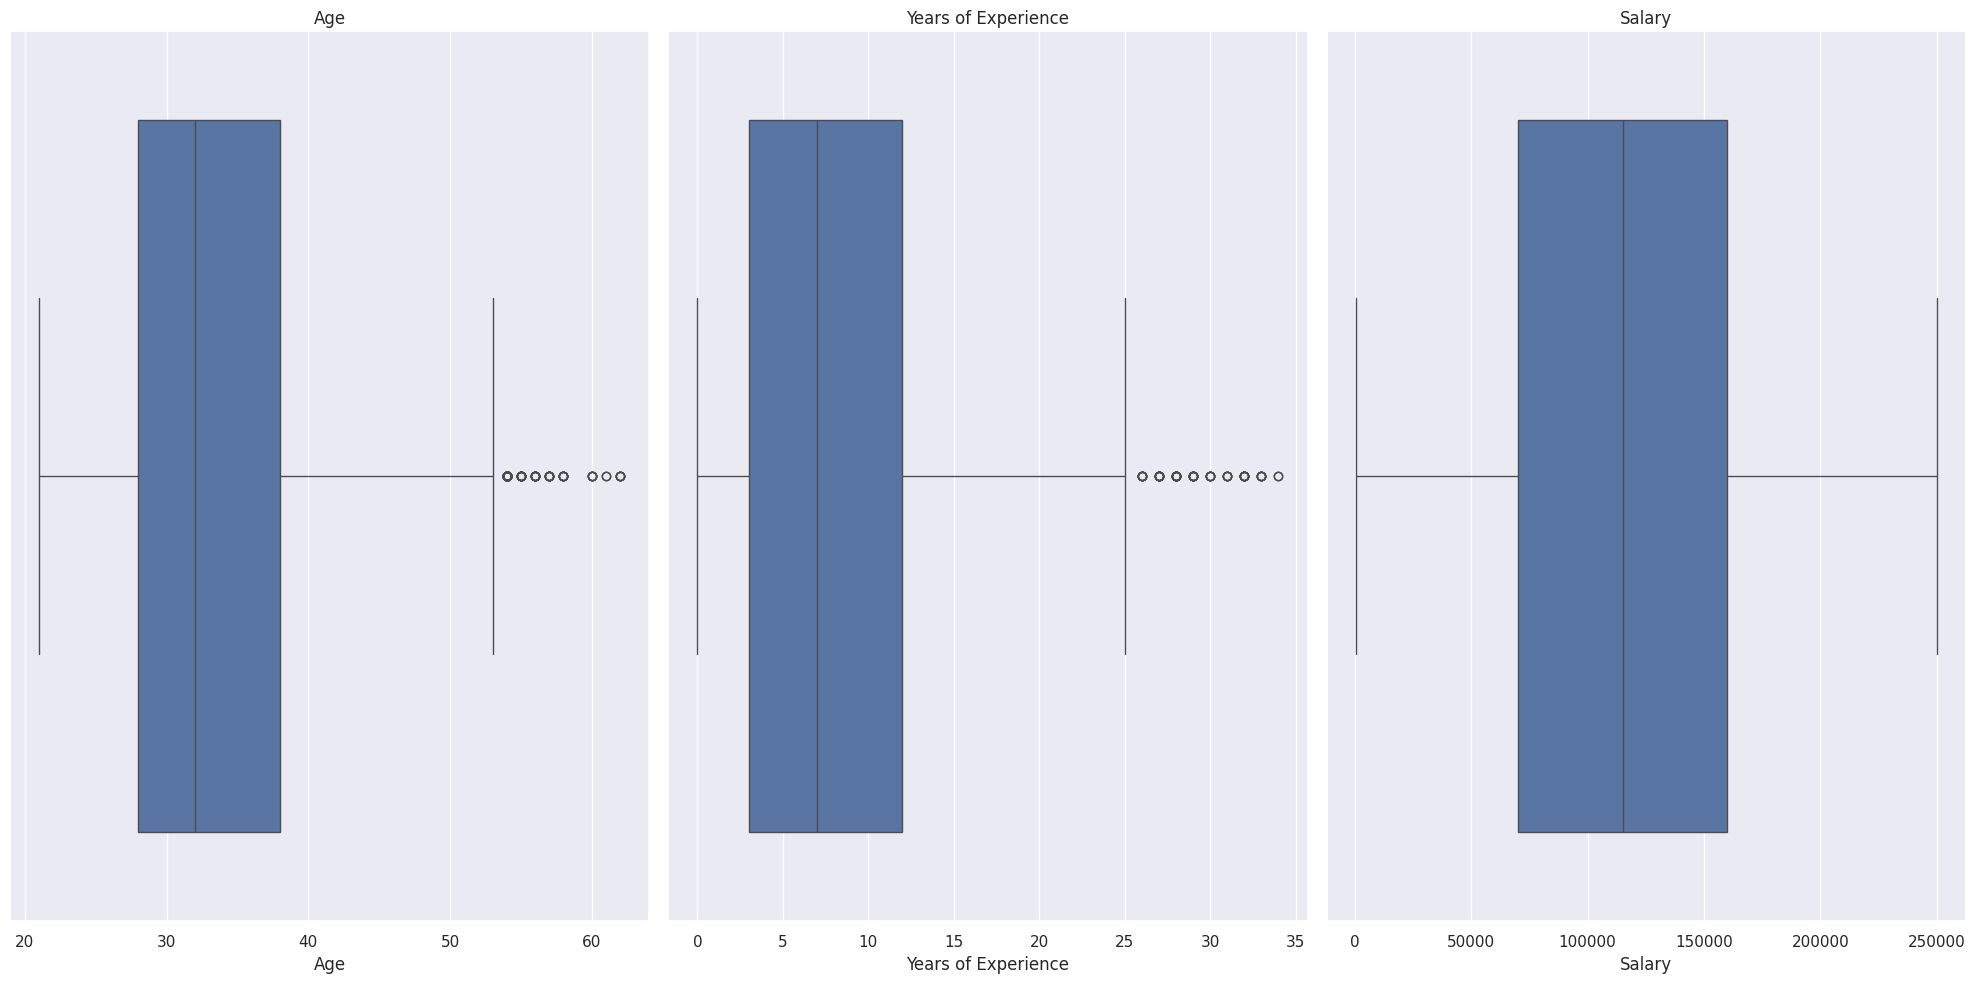

In [244]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
# cat_vars.remove('Education Level')
# cat_vars.remove('Job Title')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

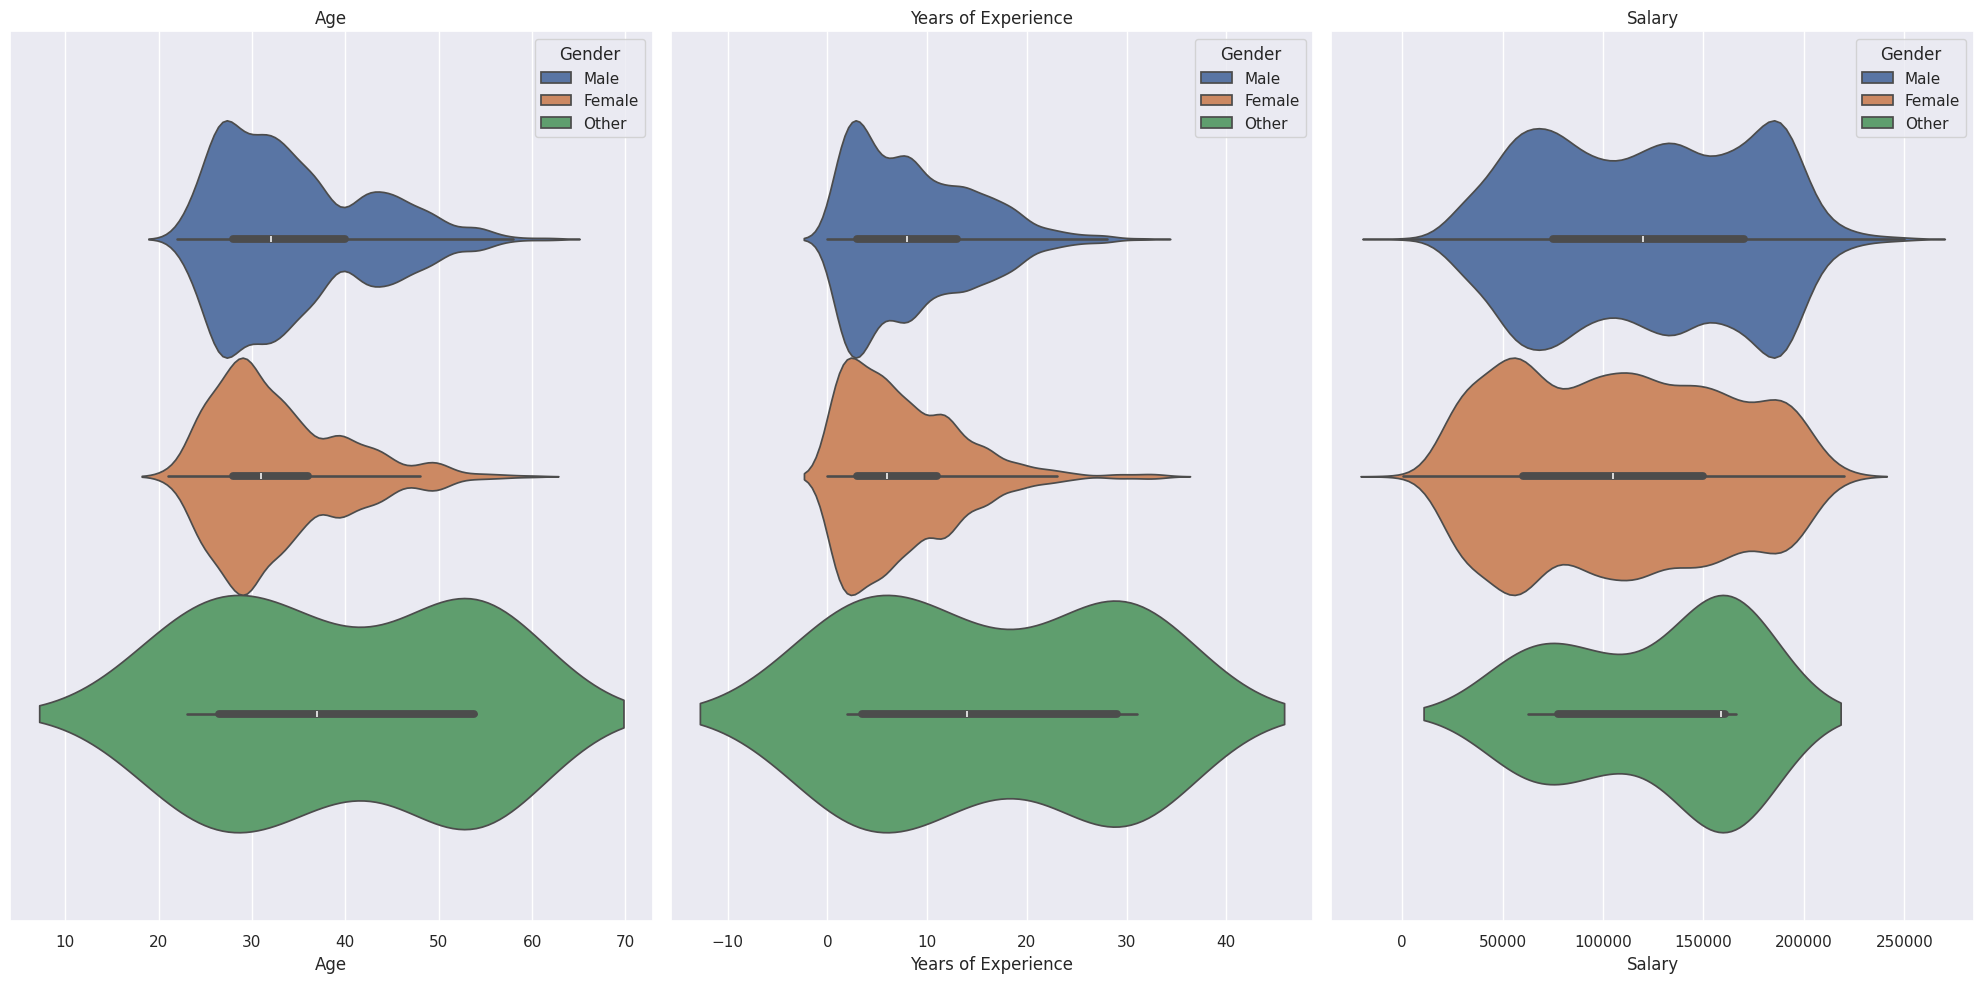

In [245]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
# cat_vars.remove('Education Level')
# cat_vars.remove('Job Title')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.violinplot(x=var,hue='Gender',data=df,ax=axs[i])
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Salary'>

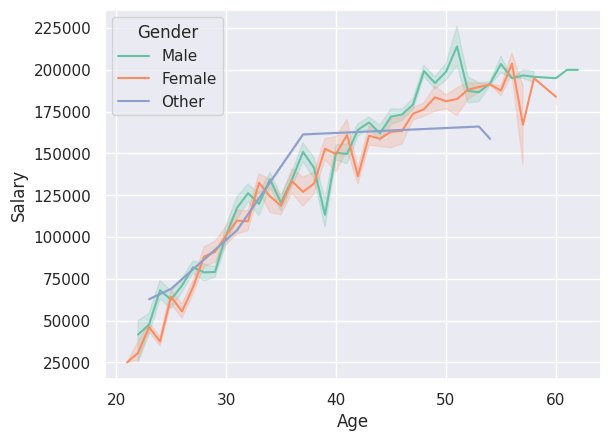

In [246]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='Age',y='Salary',hue='Gender',data=df)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

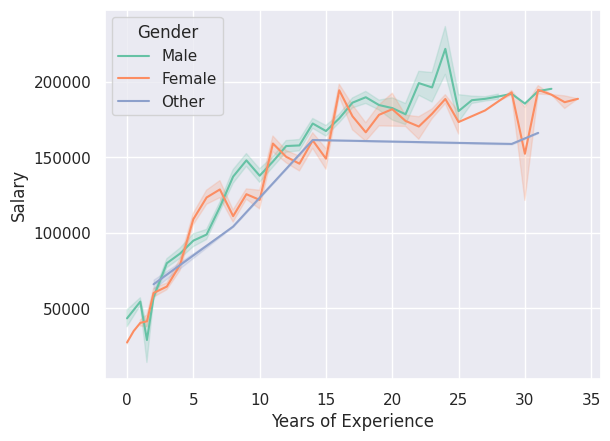

In [247]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='Years of Experience',y='Salary',hue='Gender',data=df)

# Preprocessing Data Part 2

In [248]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5
segment_job_title,0
segment_education,0


In [249]:
df=df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,segment_job_title,segment_education
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Other,Bachelor
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data,Master
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Other,PhD
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales,Bachelor
4,52.0,Male,Master's,Director,20.0,200000.0,Other,Master
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,Other,PhD
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Sales,High School
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Finance,Bachelor
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Marketing,Master


In [250]:
df=df.drop(columns=['Job Title'])
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,segment_job_title,segment_education
0,32.0,Male,Bachelor's,5.0,90000.0,Other,Bachelor
1,28.0,Female,Master's,3.0,65000.0,Data,Master
2,45.0,Male,PhD,15.0,150000.0,Other,PhD
3,36.0,Female,Bachelor's,7.0,60000.0,Sales,Bachelor
4,52.0,Male,Master's,20.0,200000.0,Other,Master


In [251]:
from scipy import stats

select=['Salary']
zscore=np.abs(stats.zscore(df[select]))

index=np.where(zscore >3)[0]
df=df.drop(df[index])
df.shape

(6698, 7)

In [252]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for i in df.select_dtypes(include='object').columns:
  df[i]=encoder.fit_transform(df[i])

In [253]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,segment_job_title,segment_education
0,32.0,1,0,5.0,90000.0,11,0
1,28.0,0,3,3.0,65000.0,3,2
2,45.0,1,5,15.0,150000.0,11,3
3,36.0,0,0,7.0,60000.0,13,0
4,52.0,1,3,20.0,200000.0,11,2


<Axes: >

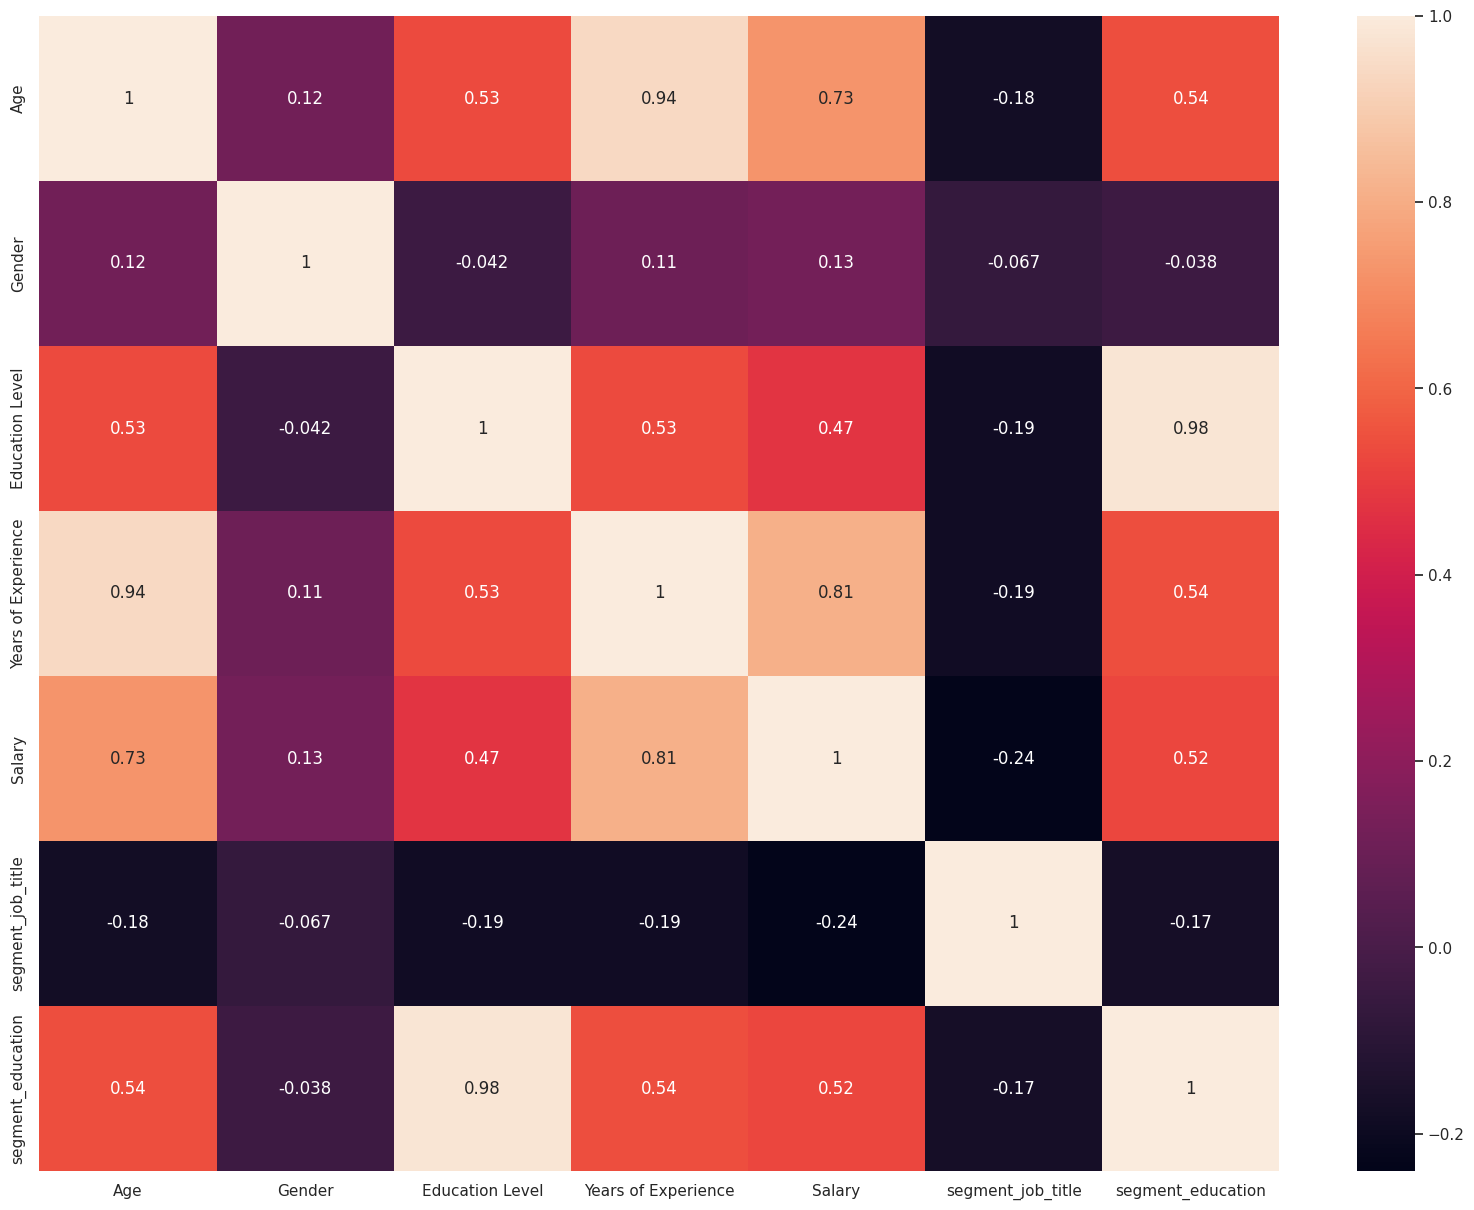

In [254]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

# Model Building

In [281]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='Salary',axis=1)
y=df['Salary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [282]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,segment_job_title,segment_education
0,32.0,1,0,5.0,90000.0,11,0
1,28.0,0,3,3.0,65000.0,3,2
2,45.0,1,5,15.0,150000.0,11,3
3,36.0,0,0,7.0,60000.0,13,0
4,52.0,1,3,20.0,200000.0,11,2


In [264]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grid=({
    'learning_rate':[0.1,0.001,1],
    'n_estimators':[100,50,200],
    'max_depth':[2,3,5],
})
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}


In [265]:
xgb=XGBRegressor(learning_rate=1,n_estimators=200,max_depth=5)
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [266]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=xgb.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2 Score:',r2_score)

MSE: 108098042.33157249
MAE: 4742.652730002332
R2 Score: 0.9620902727660197


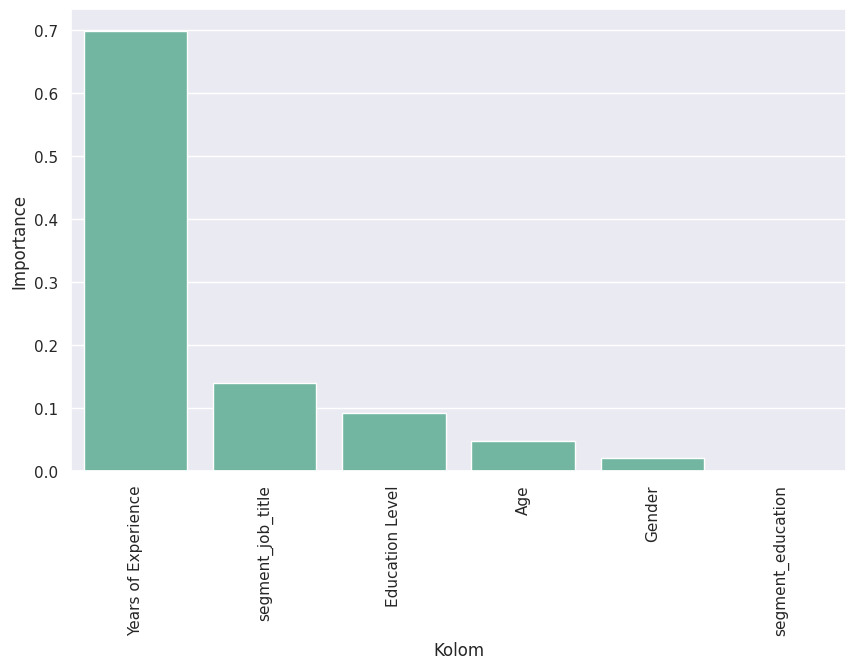

In [267]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':xgb.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
sns.barplot(x='Kolom',y='Importance',data=imp)
plt.xticks(rotation=90)
plt.show()

In [268]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))
param_grid=({
    'learning_rate':[0.1,1,0.01],
    'n_estimators':[100,50,200,150],
    'random_state':[0,42]
})
grid=GridSearchCV(ada,param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'learning_rate': 1, 'n_estimators': 100, 'random_state': 42}


In [269]:
ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),learning_rate=1,n_estimators=100,random_state=42)
ada.fit(X_train_scaled,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), learning_rate=1,
                  n_estimators=100, random_state=42)

In [270]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=ada.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2 Score:',r2_score)

MSE: 1084659188.6015692
MAE: 28490.383848219386
R2 Score: 0.6196125933937832


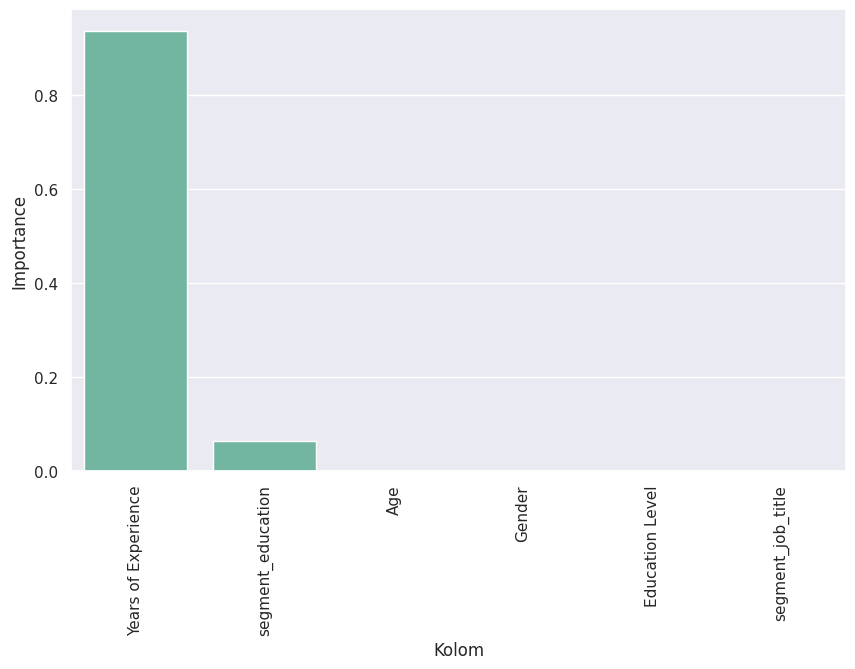

In [271]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':ada.feature_importances_
})
imp=imp_df.sort_values(by='Importance',ascending=False)
imp2=imp.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Kolom',y='Importance',data=imp)
plt.xticks(rotation=90)
plt.show()

In [272]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [273]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=rf.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2 Score:',r2_score)

MSE: 87039625.93748094
MAE: 4232.198378114216
R2 Score: 0.9694754094832128


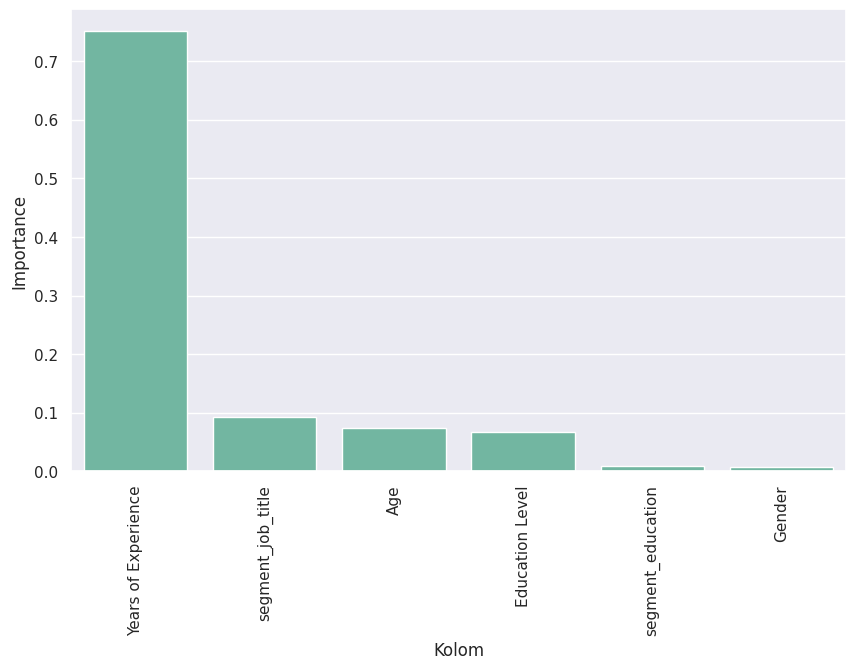

In [274]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
sns.barplot(x='Kolom',y='Importance',data=imp)
plt.xticks(rotation=90)
plt.show()

In [293]:
input_user = [[32.0, 1, 0, 5.0, 11, 0]]  # Input user
input_scaled = scaler.transform(input_user)  # Transformasi input ke dalam skala yang sama dengan data training

# Prediksi menggunakan model XGBoost
predict = xgb.predict(input_scaled)

# Mengubah prediksi menjadi array 2D dengan jumlah fitur yang sesuai
# Buat array dummy dengan jumlah kolom yang sesuai (6 kolom untuk 6 fitur), dan isi kolom lainnya dengan 0
dummy_array = np.zeros((1, 6))
dummy_array[:, 0] = predict  # Menempatkan nilai prediksi ke dalam kolom pertama

# Melakukan inverse_transform untuk mengembalikan ke skala asli
predict_reversed = scaler.inverse_transform(dummy_array)

final_prediction = predict_reversed[0][0]

# Menampilkan hasil dengan pemisah ribuan dan dua angka di belakang koma menggunakan f-string
print(f'Prediksi Gaji (setelah di reverse scale): {final_prediction:,.2f}')


Prediksi Gaji (setelah di reverse scale): 3,291,574.99


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
